<h1 style="color:red; font-size:40px; text-align:center;"> Hypothesis Testing </h1>

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by **chance?** The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of **the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.**


## Objectives


-   Import Libraries
-   Lab exercises
    -   Stating the hypothesis
    -   Levene's Test for equality
    -   Preparing your data for hypothesis testing
-   Quiz


* * *


## Import Libraries


All Libraries required for this lab are listed below. If you run this notebook in a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.


In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scipy

Import the libraries we need for the lab


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

Read in the csv file from the URL using the request library


In [3]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)

## Lab Exercises


### T-Test: Using the teachers' rating data set, does gender affect teaching evaluation rates?


We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is no difference in evaluation scores between male and females")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in evaluation scores between male and females")


We can plot the dependent variable with a historgram


[Text(0.5, 0, 'Evaluation'), Text(0, 0.5, 'Frequency')]

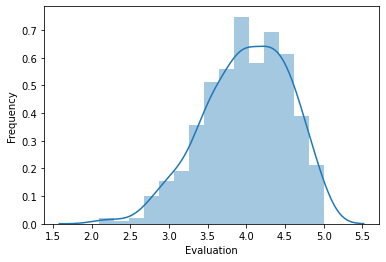

In [17]:
ax = sns.distplot(ratings_df['eval'])
ax.set(xlabel='Evaluation', ylabel='Frequency')
## we can assume it is normal

We can use the Levene's Test in Python to check test significance


[Text(0.5, 0, 'Evaluation'), Text(0, 0.5, 'Frequency')]

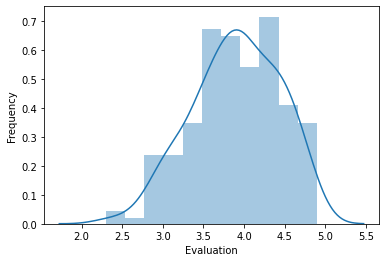

In [20]:
ax = sns.distplot(ratings_df[ratings_df['gender'] == 'female']['eval'])
ax.set(xlabel='Evaluation', ylabel='Frequency')

[Text(0.5, 0, 'Evaluation'), Text(0, 0.5, 'Frequency')]

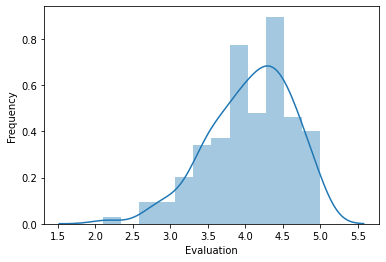

In [21]:
ax = sns.distplot(ratings_df[ratings_df['gender'] == 'male']['eval'])
ax.set(xlabel='Evaluation', ylabel='Frequency')

<AxesSubplot:xlabel='gender', ylabel='eval'>

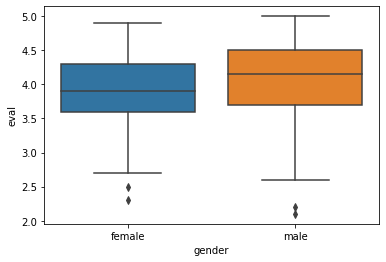

In [16]:
sns.boxplot(x=ratings_df['gender'],y=ratings_df['eval'])

In [32]:
print(type(ratings_df[ratings_df['gender'] == 'female']['eval']))
print("\nfemale:",list(ratings_df[ratings_df['gender'] == 'female']['eval'])[:5])
print("count:",len(list(ratings_df[ratings_df['gender'] == 'female']['eval'])))
print("mean",np.mean(list(ratings_df[ratings_df['gender'] == 'female']['eval'])))
print("\nmale:",list(ratings_df[ratings_df['gender'] == 'male']['eval'])[:5])
print("count:",len(list(ratings_df[ratings_df['gender'] == 'male']['eval'])))
print("mean",np.mean(list(ratings_df[ratings_df['gender'] == 'male']['eval'])))

<class 'pandas.core.series.Series'>

female: [4.30000019073486, 3.70000004768372, 3.59999990463257, 4.40000009536743, 4.30000019073486]
count: 195
mean 3.901025635156876

male: [4.5, 4.0, 2.09999990463257, 3.70000004768372, 3.20000004768372]
count: 268
mean 4.06902985163589


**LEVENE TEST**

In [4]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')

# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=0.1903292243529225, pvalue=0.6628469836244741)

**Das bedeutet: Gender macht keine unterschiede, weil p (ziemlich) kleiner als 0.05 ist.**

**TTEST_IND**

Use the <code>ttest_ind</code>


In [5]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], equal_var = True)

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

# !!!
- **Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on gender


### ANOVA: Using the teachers' rating data set, does beauty  score for instructors  differ by age?


First, we group the data into cateries as the one-way ANOVA can't work with continuous variable, we will create a new column for this newly assigned group our categories will be teachers that are:

-   40 years and younger
-   between 40 and 57 years
-   57 years and older


In [36]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

State the hypothesis

-   $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


In [39]:
ratings_df[['age_group','beauty']]

,age_group,beauty
0,40 years and younger,0.289916
1,40 years and younger,0.289916
2,40 years and younger,0.289916
3,40 years and younger,0.289916
4,57 years and older,-0.737732
...,...,...
458,40 years and younger,0.933396
459,57 years and older,0.111563
460,between 40 and 57 years,-0.900580
461,40 years and younger,0.643014


<AxesSubplot:xlabel='age_group', ylabel='beauty'>

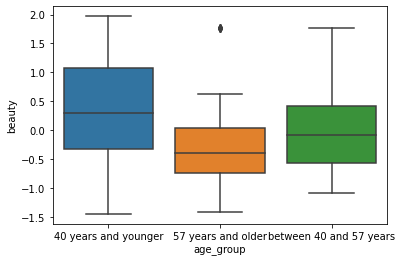

In [38]:
sns.boxplot(x=ratings_df['age_group'],y=ratings_df['beauty'])

Test for equality of variance


In [7]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['beauty'], 
                   center='mean')
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=8.60005668392584, pvalue=0.000215366180993476)

First, separate the three samples (one for each job category) into a variable each.


In [41]:
forty_lower = ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty']
forty_fiftyseven = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty']
fiftyseven_older = ratings_df[ratings_df['age_group'] == '57 years and older']['beauty']

In [42]:
print(forty_lower[:5])

0    0.289916
1    0.289916
2    0.289916
3    0.289916
9   -0.677963
Name: beauty, dtype: float64


Now, run a one-way ANOVA.


In [9]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 17.597558611010122, P-Value: 4.3225489816137975e-08


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


### ANOVA: Using the teachers' rating data set, does teaching  evaluation  score for instructors  differ  by age?


Test for equality of variance


In [10]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['eval'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['eval'], 
                   center='mean')


LeveneResult(statistic=3.820237661494229, pvalue=0.02262141852021939)

In [11]:
forty_lower_eval = ratings_df[ratings_df['age_group'] == '40 years and younger']['eval']
forty_fiftyseven_eval = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval']
fiftyseven_older_eval = ratings_df[ratings_df['age_group'] == '57 years and older']['eval']

In [12]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower_eval, forty_fiftyseven_eval, fiftyseven_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 1.2226327996572204, P-Value: 0.29540894225417536


**Conclusion:** Since the p-value is greater than 0.05, we will fail to reject the null hypothesis as there is no significant evidence that at least one of the means differ.


### Chi-square: Using the teachers' rating data set, is there an association between tenure and gender?


State the hypothesis:

-   $H_0:$ The proportion of teachers who are tenured is independent of gender
-   $H_1:$ The proportion of teachers who are tenured is associated with gender


Create a Cross-tab table


In [44]:
cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


Use the <code>scipy.stats</code> library and set correction equals False as that will be the same answer when done by hand, it returns: 𝜒2 value, p-value, degree of freedom, and expected values.


In [58]:
a=[]
a=scipy.stats.chi2_contingency(cont_table, correction = True)

print("len(a):",len(a),"\nx2:",a[0],"\np_value:",a[1],"\ndegreeOfFreedom:",a[2],"\nexpectedValues:",a[3])

len(a): 4 
x2: 2.20678166999886 
p_value: 0.1374050603563787 
degreeOfFreedom: 1 
expectedValues: [[ 42.95896328  59.04103672]
 [152.04103672 208.95896328]]


**Conclusion:** Since the p-value is greater than 0.05, we fail to reject the null hypothesis. As there is no sufficient evidence that teachers are tenured as a result of gender.


### Correlation: Using the teachers rating dataset, Is teaching  evaluation  score correlated with  beauty score?


State the hypothesis:

-   $H_0:$ Teaching evaluation score is not correlated with beauty score
-   $H_1:$ Teaching evaluation score is correlated with beauty score


Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot


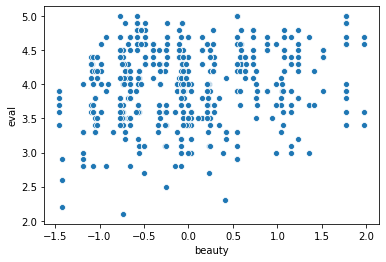

In [15]:
ax = sns.scatterplot(x="beauty", y="eval", data=ratings_df)

In [16]:
scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

(0.1890390908404521, 4.247115419812614e-05)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  beauty and teaching evaluation score.


In [59]:
ratings_df.corr()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
age,1.000000,-0.297893,-0.051696,-0.030461,-0.012626,0.078193,-0.041844,-0.103120,-0.285088,-0.025277,0.091463,0.002055,-0.098865
beauty,-0.297893,1.000000,0.189039,0.130650,0.099602,0.054353,0.056603,0.033060,0.125719,-0.084704,-0.032577,-0.010293,-0.019135
eval,-0.051696,0.189039,1.000000,0.035467,-0.001229,0.019860,-0.113706,-0.076655,-0.149660,0.235240,-0.115002,0.141435,-0.129527
students,-0.030461,0.130650,0.035467,1.000000,0.972056,0.024911,0.014247,-0.093227,-0.101915,-0.101831,-0.166689,0.081700,0.140066
allstudents,-0.012626,0.099602,-0.001229,0.972056,1.000000,0.030963,0.012770,-0.096993,-0.125560,-0.107882,-0.203698,0.086507,0.151219
prof,0.078193,0.054353,0.019860,0.024911,0.030963,1.000000,0.037945,0.033525,-0.064894,0.203350,-0.459876,-0.054686,0.026793
PrimaryLast,-0.041844,0.056603,-0.113706,0.014247,0.012770,0.037945,1.000000,-0.015456,0.004463,-0.056861,0.021263,-0.029629,0.073955
vismin,-0.103120,0.033060,-0.076655,-0.093227,-0.096993,0.033525,-0.015456,1.000000,0.114642,0.247490,-0.136129,-0.292186,0.061896
female,-0.285088,0.125719,-0.149660,-0.101915,-0.125560,-0.064894,0.004463,0.114642,1.000000,-0.044268,0.056579,-0.003805,-0.074315
single_credit,-0.025277,-0.084704,0.235240,-0.101831,-0.107882,0.203350,-0.056861,0.247490,-0.044268,1.000000,-0.327947,0.024469,-0.290251


## Practice Questions


### Question 1: Using the teachers rating data set, does tenure affect teaching evaluation scores?

-   Use α = 0.05


In [60]:
scipy.stats.ttest_ind(ratings_df[ratings_df['tenure'] == 'yes']['eval'],
                   ratings_df[ratings_df['tenure'] == 'no']['eval'], equal_var = True)

Ttest_indResult(statistic=-2.8046798258451777, pvalue=0.005249471210198792)


The p-value is less than 0.05 that means that - we will reject the null hypothesis as there evidence that being tenured affects teaching evaluation scores


### Question 2: Using the teachers rating data set, is there an association between age and tenure?

-   Discretize the age into three groups 40 years and youngers, between 40 and 57 years, 57 years and older (This has already been done for you above.)
-   What is your conclusion at α = 0.01 and α = 0.05?


- Null Hypothesis: There is no association between age and tenure
- Alternative Hypothesis: There is an association between age and tenure


In [62]:
cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['age_group'])
cont_table

age_group,40 years and younger,57 years and older,between 40 and 57 years
tenure,,,
no,15,25,62
yes,98,97,166


In [64]:
b=[]
b=scipy.stats.chi2_contingency(cont_table, correction = True)

print("\nx2:",b[0],"\np_value:",b[1],"\ndegreeOfFreedom:",b[2],"\nexpectedValues:",b[3])



x2: 8.749576239010711 
p_value: 0.012590809706820843 
degreeOfFreedom: 2 
expectedValues: [[ 24.89416847  26.87688985  50.22894168]
 [ 88.10583153  95.12311015 177.77105832]]



At the α = 0.01, p-value is greater, we fail to reject null hypothesis as there is no evidence of an association between age and tenure
At the α = 0.05, p-value is less, we reject null hypoothesis as there is evidence of an association between age and tenure


### Question 3: Test for equality of variance for beauty scores between tenured and non-tenured instructors

-   Use α = 0.05


<AxesSubplot:xlabel='tenure', ylabel='beauty'>

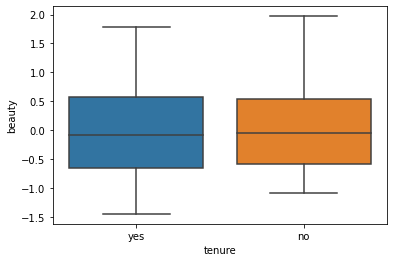

In [65]:
sns.boxplot(x=ratings_df['tenure'],y=ratings_df['beauty'])

In [20]:
scipy.stats.levene(ratings_df[ratings_df['tenure'] == 'yes']['beauty'],
                   ratings_df[ratings_df['tenure'] == 'no']['beauty'], 
                   center='mean')

LeveneResult(statistic=0.48842416527504556, pvalue=0.4849835158609811)

we used the levene function to find the p-value and conclusion

Since the p-value is greater than 0.05, we will assume equality of variance of both groups


### Question 4: Using the teachers rating data set, is there an association between visible minorities and tenure?

-   Use α = 0.05


- Null Hypothesis: There is no association between visible minorities and tenure
- Alternative Hypothesis: There is an association between visible minorities and tenure

In [66]:
cont_table  = pd.crosstab(ratings_df['vismin'], ratings_df['tenure'])
cont_table

tenure,no,yes
vismin,,
0,92,307
1,10,54


In [68]:
c=scipy.stats.chi2_contingency(cont_table, correction = True)
c[1]

0.24223968800237178

Since the p-value is greater than 0.05, we fail to reject null hypoothesis as there is evidence of an association between visible minorities and tenure


The End